In [1]:
from pandas import DataFrame, Series
from lxml import objectify
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 원/환율 데이터 로드

In [2]:
data = []
skip_fields = ['STAT_CODE', 'STAT_NAME', 'ITEM_CODE1', 'ITEM_CODE2', 'ITEM_NAME2',
              'ITEM_CODE3', 'ITEM_NAME3', 'UNIT_NAME']
path_list = ['../Stock_data/Rate/rate1.xml', '../Stock_data/Rate/rate2.xml', '../Stock_data/Rate/rate3.xml', '../Stock_data/Rate/rate4.xml', '../Stock_data/Rate/rate5.xml', '../Stock_data/Rate/rate6.xml']
for path in path_list:
    parsed = objectify.parse(open(path))
    root = parsed.getroot()

    for elt in root.row:
        el_data = {}
        for child in elt.getchildren():
            if child.tag in skip_fields:
                continue
            el_data[child.tag] = child.pyval
        data.append(el_data)

In [7]:
rate = pd.DataFrame(data)

In [8]:
# 입력 데이터 예시
rate.head()

,ITEM_NAME1,TIME,DATA_VALUE
0,원/미국달러(매매기준율),19900103,680.8
1,원/미국달러(매매기준율),19900104,681.5
2,원/미국달러(매매기준율),19900105,681
3,원/미국달러(매매기준율),19900106,680.9
4,원/미국달러(매매기준율),19900108,680.9


# 전처리

In [9]:
# column 명 변경
rate.columns=['item_name', 'time', 'rate_value']

In [10]:
# datetime 형식 변경
rate['time'] = rate['time'].map(lambda x:datetime.strptime(str(x), "%Y%m%d").date())

In [40]:
# rate2 = rate.set_index(['time','item_name'])
# rate2= rate2.sort_index()
# rate2

In [11]:
# Multi index Series
z=Series(list(rate.rate_value), index=[rate.time, rate.item_name])

In [13]:
# 원/환율 종류
rate.item_name.unique()

array(['원/미국달러(매매기준율)', '원/일본엔(100엔)', '원/유로', '원/독일마르크', '원/프랑스프랑',
       '원/이태리리라(100리라)', '원/벨기에프랑', '원/오스트리아실링', '원/네덜란드길더',
       '원/스페인페세타(100페세타)', '원/핀란드마르카', '원/영국파운드', '원/캐나다달러', '원/스위스프랑',
       '원/홍콩달러', '원/스웨덴크로나', '원/호주달러', '원/덴마크크로네', '원/노르웨이크로네',
       '원/사우디아라비아리알', '원/쿠웨이트디나르', '원/바레인디나르', '원/아랍연방토후국 더히람', '원/싱가폴달러',
       '원/말레이지아링기트', '원/뉴질랜드달러', '원/중국위안', '원/태국바트', '원/인도네시아루피아(100루피아)',
       '원/홍콩위안', '원/위안(매매기준율)', '원/대만달러', '원/몽골투그릭', '원/카자흐스탄텡게',
       '원/필리핀페소', '원/베트남동', '원/브루나이달러', '원/인도루피', '원/파키스탄루피', '원/방글라데시타카',
       '원/멕시코 페소', '원/브라질 헤알', '원/아르헨티나페소', '원/러시아루블', '원/헝가리포린트',
       '원/폴란트즈워티', '원/체코코루나', '원/카타르리얄', '원/이스라엘셰켈', '원/요르단디나르', '원/터키리라',
       '원/남아프리카공화국랜드', '원/이집트파운드'], dtype=object)

In [1]:
# Multi index를 가지는 Series 객체를 dataframe으로
time_rate=z.unstack()
time_rate.head()

# 시각화

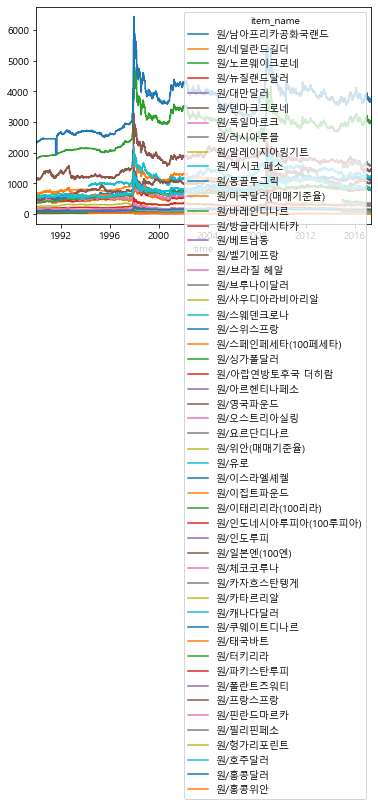

In [15]:
# 시각화 간략
%matplotlib inline
time_rate.plot()